#ÁRBOL DE DECISIÓN PARA ESPECIES DE FLORES

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/iris/iris.csv'
data = pd.read_csv(url)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

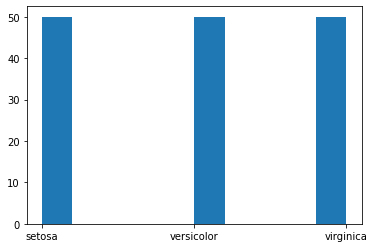

In [86]:
plt.hist(data.Species)

In [87]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [88]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
colnames, predictors, target

(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
 ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
 'Species')

In [89]:
import numpy as np

In [90]:
data['is_train'] = np.random.uniform(0, 1, len(data))  <= 0.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

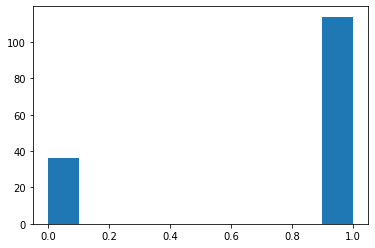

In [91]:
plt.hist(data.is_train.astype(int))

In [92]:
train, test = data[data['is_train'] == True], data[data['is_train'] == False]
train.shape, train.shape[0] / len(data), test.shape, test.shape[0]/len(data)

((114, 6), 0.76, (36, 6), 0.24)

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [95]:
preds = tree.predict(test[predictors])

In [96]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames = ['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,15,0
virginica,0,3,8


In [97]:
tree.score(test[predictors], test[target])

0.9166666666666666

##Visualización del árbol de decisión

In [98]:
from sklearn.tree import export_graphviz

In [99]:
with open ('/content/tree_output/iris_dtree.dot', 'w') as dotfile:
  export_graphviz(tree, out_file = dotfile, feature_names = predictors)
  dotfile.close()

In [100]:
import os 
from graphviz import Source

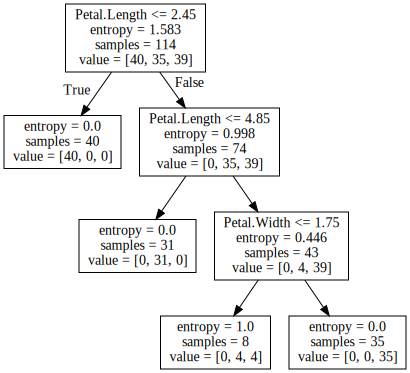

In [101]:
file = open('/content/tree_output/iris_dtree.dot', 'r')
text = file.read()
Source(text)

In [102]:
data[data['Petal.Length'] <= 2.45].Species.unique()

array(['setosa'], dtype=object)

In [103]:
text.replace('\n','') #Para poder usar en graphviz online

'digraph Tree {node [shape=box] ;0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 114\\nvalue = [40, 35, 39]"] ;1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;2 [label="Petal.Length <= 4.85\\nentropy = 0.998\\nsamples = 74\\nvalue = [0, 35, 39]"] ;0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;3 [label="entropy = 0.0\\nsamples = 31\\nvalue = [0, 31, 0]"] ;2 -> 3 ;4 [label="Petal.Width <= 1.75\\nentropy = 0.446\\nsamples = 43\\nvalue = [0, 4, 39]"] ;2 -> 4 ;5 [label="entropy = 1.0\\nsamples = 8\\nvalue = [0, 4, 4]"] ;4 -> 5 ;6 [label="entropy = 0.0\\nsamples = 35\\nvalue = [0, 0, 35]"] ;4 -> 6 ;}'

## Cross Validation para la poda

In [104]:
X = data[predictors]
Y = data[target]

In [105]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 20, random_state = 99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [106]:
from sklearn.model_selection import KFold

In [107]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
score = np.mean(cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1))
score

0.9333333333333333

In [110]:
for i in range (1,11):
  tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, min_samples_split = 20, random_state = 99)
  tree.fit(X,Y)
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1)
  score = np.mean(scores)
  print('Para una profundidad máxima de', i, 'el score es de', score)
  print('   La importancia de cada variable predictora es la siguiente:', tree.feature_importances_)

Para una profundidad máxima de 1 el score es de 0.5666666666666667
   La importancia de cada variable predictora es la siguiente: [0. 0. 1. 0.]
Para una profundidad máxima de 2 el score es de 0.9200000000000002
   La importancia de cada variable predictora es la siguiente: [0.         0.         0.66620285 0.33379715]
Para una profundidad máxima de 3 el score es de 0.9400000000000001
   La importancia de cada variable predictora es la siguiente: [0.         0.         0.68976981 0.31023019]
Para una profundidad máxima de 4 el score es de 0.9333333333333333
   La importancia de cada variable predictora es la siguiente: [0.         0.         0.66869158 0.33130842]
Para una profundidad máxima de 5 el score es de 0.9333333333333333
   La importancia de cada variable predictora es la siguiente: [0.         0.         0.66869158 0.33130842]
Para una profundidad máxima de 6 el score es de 0.9333333333333333
   La importancia de cada variable predictora es la siguiente: [0.         0.        

In [111]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']